# Pickit 

## Fastag for Shopping

### Importing modules

In [1]:
import torch
from IPython.display import Image 
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageTk

### Training the model with custom dataset

In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --batch 32 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 24 --name yolo_det_grocery_final

wandb: Currently logged in as: nakulvarma2000. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_det_grocery_final, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (16/16), done.
remote: Total 23 (delta 16), reused 16 (delta 16), pack-reused 7
Unpacking objects: 100% (23/23), done.
From https://github.com/ultralytics/yolov5
   ce97b67..479a9ac  classifier -> origin/classifier
githu

### Summary of the model

YOLOv5s summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:03<00:00,  1.56s/it]
                 all        106        106      0.945      0.928      0.955      0.575
               bread        106         23      0.988          1      0.995      0.602
              butter        106         21      0.868          1      0.957      0.563
             coconut        106         17      0.978          1      0.995      0.617
                 egg        106         24      0.904      0.783      0.845      0.453
                milk        106         21      0.986      0.857      0.981      0.641

Here we can see that the precision and recall for all the classes are very good. Thus our model was trained very well

Here the weights of the model is saved as best.pt. This file is used for further detection and testing

### Testing with new images

#### We have shown the results here

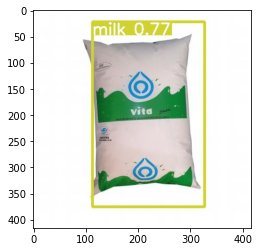

In [4]:
detections_dir = "C:\\Users\\nakul\\Desktop\\yolov5\\runs\\detect\\yolo_det_grocery_final_54"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

### Detection Function

In [5]:
def run_detect(filename):
    s = !python detect.py --source $filename --weights "C:\Users\nakul\Desktop\yolov5\best.pt" --conf 0.25
    item = []
    for i in range(len(s)):
        if('Done' in s[i]):
            item.append(s[i])

    for i in item:
        new = i.split()
        del new[:5]
        del new[-2:]
        for j in new:
            j = j[:-1]
    return j

### Recommendation Function

In [6]:
import numpy as np
import pandas as pd
from apyori import apriori
data = pd.read_csv("Grocery Products Purchase.csv",header = None)

records = []
for i in range(0,9836):
    records.append([str(data.values[i,j]) for j in range(0,32)])

association_rules = apriori(records, min_support = 0.003, min_confidence = 0.2, min_lift = 3,min_length = 2)
results = list(association_rules)

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

resultsinDataFrame['Right Hand Side'] = resultsinDataFrame['Right Hand Side'].replace(['yogurt'],'bread')
resultsinDataFrame['Right Hand Side'] = resultsinDataFrame['Right Hand Side'].replace(['nan'],'bread')
resultsinDataFrame['Right Hand Side'] = resultsinDataFrame['Right Hand Side'].replace(['root vegetables'],'milk')
resultsinDataFrame['Left Hand Side'] = resultsinDataFrame['Left Hand Side'].replace(['whole milk'],'milk')
resultsinDataFrame['Left Hand Side'] = resultsinDataFrame['Left Hand Side'].replace(['white bread'],'bread')
resultsinDataFrame['Left Hand Side'] = resultsinDataFrame['Left Hand Side'].replace(['domestic eggs'],'egg')



## App

In [8]:
window = tk.Tk()
window.title('Pickit App')
window.geometry("1920x1080+10+10")
bg = ImageTk.PhotoImage(Image.open("bg1.jpg").resize((1920,1080)))
labelbg = tk.Label(image = bg)
labelbg.place(x = 0, y = 0)
def open_image_file():
        filetypes = (
            ('JPG file', '*.jpg'),
            ('PNG file', '*.png'),
            ('All files', '*.*')
        )
        f = fd.askopenfile(filetypes=filetypes)
        filename = f.name
        image1 = Image.open(filename)
        image1 = image1.resize((300,300))
        test = ImageTk.PhotoImage(image1)
        label1 = tk.Label(image=test)
        label1.image = test
        label1.place(x=1350, y=300)
        item = run_detect(filename)
        try:
            text_box.destroy()
        except:
            pass
        finally:
            text_box = tk.Label(window, text = 'Predicted Item: {}'.format(item), font = ("Montserrat", 12))
            text_box.place(x = 960, y = 450)
        product = item
        if product in list(resultsinDataFrame["Left Hand Side"].astype("str").unique()):
            df1 = resultsinDataFrame.loc[resultsinDataFrame["Left Hand Side"] == product].sort_values(by = ["Confidence"],ascending = False)
            try:
                text_box1.destroy()
            except:
                pass
            finally:
                text_box1 = tk.Label(window, text = 'Recommended Item: {}'.format(df1.iloc[0][1]), font = ("Montserrat", 12))
                text_box1.place(x = 960, y = 485)

def searchfn():
    try:
        img = ImageTk.PhotoImage(Image.open(search.get()+".png").resize((900,550)))
        label = tk.Label(image = img)
        label.image = img
        label.place(x = 50, y = 330)
    except:
        pass
    
open_button = tk.Button(
            window,
            text='Open a File',
            command=open_image_file,
            font = ("Montserrat", 16)
        )
img = ImageTk.PhotoImage(Image.open("Pickit.png").resize((200,200)))
label = tk.Label(image = img)
label.image = img
label.place(x = 850, y = 10)
open_button.place(x = 1250, y = 240)
searchLabel = tk.Label(window, text = 'Search for item: ', font=("Montserrat", 20))
searchLabel.place(x = 400, y = 250)
search = tk.Entry(window, width = 10, font = ("Montserrat", 16))
search.place(x = 645, y = 255)
searchbtn = ttk.Button(window, text = 'Search', command = searchfn, width = 22)
searchbtn.place(x = 645, y = 300)
window.mainloop()